### Data gathering

In [1]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
import re
import requests
from timeit import default_timer as timer

df = pd.read_csv('twitter-archive-enhanced.csv')

# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

##### Reviewing imported data both image recognition and Tweets

In [1660]:
df_1 = pd.read_json('tweet_json.txt',lines=True)
df_1.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [1661]:
df_im = pd.read_csv('image_predictions.tsv',sep='\t')
df_im.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1662]:
df_enhan = pd.read_csv('twitter-archive-enhanced.csv')
df_enhan.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Inspecting data types and completness

In [1663]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   id                             2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   full_text                      2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   display_text_range             2330 non-null   object             
 6   entities                       2330 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2330 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [1664]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1665]:
df_enhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Inspecting numerical data points

In [1666]:
df_1.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.330000e+03,2.330000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2330.000000,2330.000000,2196.0,2196.0,2.600000e+01,2.600000e+01
mean,7.419357e+17,7.419357e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2567.603004,7270.854936,0.0,0.0,8.113972e+17,8.113972e+17
std,6.823308e+16,6.823308e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4342.954326,11294.399108,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.782926e+17,6.782926e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,519.500000,1256.500000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.183508e+17,7.183508e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1197.500000,3148.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986712e+17,7.986712e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2974.000000,8882.750000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,73603.000000,149529.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [1667]:
df_im.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1668]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url,allow_redirects=True)
open('image_predictions.tsv','wb').write(r.content)

335079

##### Duplicate check

In [1669]:
df_im.tweet_id.duplicated().sum()

0

In [1670]:
df_1.id.duplicated().sum()

0

In [1671]:
df_enhan.tweet_id.duplicated().sum()

0

## Quality observations

1. Changes lang header in Tweets to language and id to tweet_id in tweets data frame
2. Change value types for id, tweet_id to object
3. Need to drop / in ratings columns change data type to int for dog_rating_denom and dog_rating_num
4. Rounding float values given in the numerator to closest integer and correcting ratings after inspection
5. Change row 300 which had completely wrong rating 13/10
6. Change dog_rating_num and dog_rating_denom to integer.
7. Remove None from doggo, floofer, pupper and puppo
8. Add dog types into one column and covert into categorical type
9. Fix double dog categories
10. For 2 dogs in the picture create duplicate row and put each dog separately
11. Adding column with calculated dog score
12. Change date format to yyy-mm-dd in tweets
13. Change languages from abbreviation to full name
14. Dropping not dogs from data frame
15. Extract breed in one column
16. Drop retweets
17. Removing underscore from breed for better visuals
18. Making all breeds lowercase for comparability

## Tidiness observations

1. Extract dog rating from tweet text
2. Extract device type how tweet was published
3. Evaluate which columns are not needed for the research and remove them

## Data wrangling - Tidiness

Creating copy of both data frames before making any changes

In [1672]:
tweets = df_1.copy()
images = df_im.copy()
enhanced = df_enhan.copy()

In [1673]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   id                             2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   full_text                      2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   display_text_range             2330 non-null   object             
 6   entities                       2330 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2330 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [1674]:
tweets.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


1. #####  Define - Finding device source

After inspecting dataset I found 3 different data sources - iphone, make a scene (twitter specific moments creation via web only), and web device. Even though make a scene is created via web I believe it's worth keeping in as separete source because it's not just a regular tweet shared via web.

##### Code

In [1675]:
#function to find all devices that tweet was published
def find_device(column,device):
    tweets[column] = tweets.source.str.findall(device)

In [1676]:
#find iphone
find_device('iphone_user','iPhone')

#find make a scene
find_device('make_a_scene','Make a Scene')

#find web
find_device('web','web')

In [1677]:
#creating new aggregated column
tweets['source_dev'] = tweets['iphone_user'] + tweets['make_a_scene'] + tweets['web']

In [1678]:
#changing lists to strings
tweets['publish_type'] = [''.join(map(str, l)) for l in tweets['source_dev']]

##### Test

In [1679]:
tweets.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,iphone_user,make_a_scene,web,source_dev,publish_type
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,[iPhone],[],[],[iPhone],iPhone


2. ##### Define - Extracting dog ratings

for quality and future analysis purposes I use regex to get numerator and demonimator as separete columns and adding 3rd one where I pull them together. Third one serves me as additional quality check in case more than 1 rating is present in review or anything is off.

##### Code

In [1680]:
#function to get dog rating using regex
def extract_ratings(new_column,regex):
    tweets[new_column] = tweets.full_text.str.extract(regex,expand=True)

In [1681]:
#numerator
extract_ratings('dog_rating_num','(\d{1,4}\/)')

#denominator
extract_ratings('dog_rating_denom','(\/\d{1,4})')

#together for quality check
extract_ratings('dog_rating','(\(?\d{1,4}\)?\/?\d{1,4})')

##### Test

In [1682]:
tweets.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,quoted_status_permalink,quoted_status,iphone_user,make_a_scene,web,source_dev,publish_type,dog_rating_num,dog_rating_denom,dog_rating
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,[iPhone],[],[],[iPhone],iPhone,13/,/10,13/10


##### Exporting dataframe as csv to expect if there are major flaws with rating extraction.

In [1683]:
tweets.to_csv('testing1.csv',index=False)

3. ##### Define - Drop unwanted data

##### Code

In [1684]:
tweets = tweets.drop(['truncated','display_text_range','entities','in_reply_to_status_id',
           'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str',
           'in_reply_to_screen_name','geo','coordinates','place','contributors',
           'favorited','retweeted','possibly_sensitive','retweeted_status',
           'quoted_status_id','quoted_status_id_str','quoted_status_permalink','quoted_status',
            'possibly_sensitive_appealable','id_str','extended_entities','user',
            'iphone_user','web','make_a_scene','source','source_dev','dog_rating','full_text',
            'is_quote_status'],axis=1)

##### Test

In [1685]:
tweets.head(1)

,created_at,id,retweet_count,favorite_count,lang,publish_type,dog_rating_num,dog_rating_denom
0,2017-08-01 16:23:56+00:00,892420643555336193,7293,34820,en,iPhone,13/,/10


# Quality cleaning 

1. ##### Define - Changing headers for lang and id in tweet data frame

##### Code

In [1686]:
tweets = tweets.rename(columns={'id':'tweet_id','lang':'language'})

##### Test

In [1687]:
tweets.head(1)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom
0,2017-08-01 16:23:56+00:00,892420643555336193,7293,34820,en,iPhone,13/,/10


2. ##### Define - Change data types for id,tweet_id to object

##### Code

In [1688]:
tweets.tweet_id = tweets.tweet_id.astype(object)
images.tweet_id = images.tweet_id.astype(object)
enhanced.tweet_id = enhanced.tweet_id.astype(object)

##### Test

In [1689]:
tweets.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2325    666049248165822465
2326    666044226329800704
2327    666033412701032449
2328    666029285002620928
2329    666020888022790149
Name: tweet_id, Length: 2330, dtype: object

In [1690]:
images.tweet_id

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

In [1691]:
enhanced.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: object

##### Merge three files

In [1692]:
#first merge first 2 files then merge results with third file
tweet_image = pd.merge(tweets,images,on = ['tweet_id'],how='left')
main = pd.merge(tweet_image,enhanced,on=['tweet_id'],how='left')

In [1693]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2329
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   created_at                  2330 non-null   datetime64[ns, UTC]
 1   tweet_id                    2330 non-null   object             
 2   retweet_count               2330 non-null   int64              
 3   favorite_count              2330 non-null   int64              
 4   language                    2330 non-null   object             
 5   publish_type                2330 non-null   object             
 6   dog_rating_num              2330 non-null   object             
 7   dog_rating_denom            2330 non-null   object             
 8   jpg_url                     2058 non-null   object             
 9   img_num                     2058 non-null   float64            
 10  p1                          2058 non-null   object          

9. ##### Define - Dropping / from dog_rating_denom and dog_rating_num

##### Code

In [1694]:
# function to get rid of /
def clean_rating(column):
    main[column] = main[column].str.replace(r'\D','',regex=True)

In [1695]:
#clean numerator
clean_rating('dog_rating_num')

#clean denominator
clean_rating('dog_rating_denom')

##### Test

In [1696]:
main.head(1)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,2017-08-01 16:23:56+00:00,892420643555336193,7293,34820,en,iPhone,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


10. ##### Define - Rounding float values given in the numerator to closest integer and correcting ratings after inspection

##### Code

In [1697]:
#function for all 3 changes
def value_change(row,column,new_value):
    main.at[row,column] = new_value

In [1698]:
#change values in cells
value_change(44,'dog_rating_num',14)
value_change(327,'dog_rating_num',10)
value_change(744,'dog_rating_num',11)

##### Test

In [1699]:
main.iloc[327]

created_at                                            2017-02-16 13:11:05+00:00
tweet_id                                                     832215726631055365
retweet_count                                                              8917
favorite_count                                                                0
language                                                                     en
publish_type                                                             iPhone
dog_rating_num                                                               10
dog_rating_denom                                                             10
jpg_url                         https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg
img_num                                                                     1.0
p1                                                                 Afghan_hound
p1_conf                                                                0.274637
p1_dog                                  

10. ##### Define - Change row 300 which had completely wrong rating 13/10

##### Code

In [1700]:
value_change(299,'dog_rating_num',13)
value_change(299,'dog_rating_denom',10)

##### Test

In [1701]:
main.iloc[299]

created_at                                            2017-02-24 21:54:03+00:00
tweet_id                                                     835246439529840640
retweet_count                                                                68
favorite_count                                                             2033
language                                                                     en
publish_type                                                             iPhone
dog_rating_num                                                               13
dog_rating_denom                                                             10
jpg_url                                                                     NaN
img_num                                                                     NaN
p1                                                                          NaN
p1_conf                                                                     NaN
p1_dog                                  

3. ##### Define - Change dog_rating_num and dog_rating_denom to integer

##### Code

In [1702]:
main.dog_rating_num = main.dog_rating_num.astype(int)
main.dog_rating_denom = main.dog_rating_denom.astype(int)

##### Test

In [1703]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2329
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   created_at                  2330 non-null   datetime64[ns, UTC]
 1   tweet_id                    2330 non-null   object             
 2   retweet_count               2330 non-null   int64              
 3   favorite_count              2330 non-null   int64              
 4   language                    2330 non-null   object             
 5   publish_type                2330 non-null   object             
 6   dog_rating_num              2330 non-null   int64              
 7   dog_rating_denom            2330 non-null   int64              
 8   jpg_url                     2058 non-null   object             
 9   img_num                     2058 non-null   float64            
 10  p1                          2058 non-null   object          

11. ##### Define - Remove None from doggo, floofer, pupper and puppo

##### Code

In [1704]:
main = main.replace(to_replace={'doggo':{'None':''},
                               'floofer':{'None':''},
                               'pupper':{'None':''},
                               'puppo':{'None':''}})

##### Test

In [1705]:
main.head(2)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,2017-08-01 16:23:56+00:00,892420643555336193,7293,34820,en,iPhone,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,2017-08-01 00:17:27+00:00,892177421306343426,5452,30157,en,iPhone,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,


12. ##### Define - Add dog types into one column and covert into categorical type

##### Code

In [1706]:
main['dog_type'] = (main['doggo'] + main['floofer'] + main['pupper'] + main['puppo']).astype('category')

##### Test

In [1707]:
main.dog_type

0        
1        
2        
3        
4        
       ..
2325     
2326     
2327     
2328     
2329     
Name: dog_type, Length: 2330, dtype: category
Categories (8, object): ['', 'doggo', 'doggofloofer', 'doggopupper', 'doggopuppo', 'floofer', 'pupper', 'puppo']

In [1708]:
main.groupby('dog_type').count()

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
dog_type,,,,,,,,,,,,,,,,,,,,,
,1955,1955,1955,1955,1955,1955,1955,1955,1740,1740,...,131,131,1902,1955,1955,1955,1955,1955,1955,1955
doggo,80,80,80,80,80,80,80,80,65,65,...,6,6,77,80,80,80,80,80,80,80
doggofloofer,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
doggopupper,12,12,12,12,12,12,12,12,11,11,...,2,2,12,12,12,12,12,12,12,12
doggopuppo,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
floofer,9,9,9,9,9,9,9,9,7,7,...,0,0,9,9,9,9,9,9,9,9
pupper,243,243,243,243,243,243,243,243,210,210,...,19,19,241,243,243,243,243,243,243,243
puppo,29,29,29,29,29,29,29,29,23,23,...,5,5,28,29,29,29,29,29,29,29


13. ##### Define - Fix double dog cattegories

##### Code

In [1709]:
main.query('dog_type=="doggopupper"').text

444     This is Dido. She's playing the lead role in "...
514     Here we have Burke (pupper) and Dexter (doggo)...
548     Like doggo, like pupper version 2. Both 11/10 ...
557     This is Bones. He's being haunted by another d...
687     This is Pinot. He's a sophisticated doggo. You...
715     Pupper butt 1, Doggo 0. Both 12/10 https://t.c...
759     RT @dog_rates: Like father (doggo), like son (...
800     RT @dog_rates: This is just downright precious...
867     Meet Maggie &amp; Lila. Maggie is the doggo, L...
932     Please stop sending it pictures that don't eve...
1039    This is just downright precious af. 12/10 for ...
1089    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object

In [1710]:
def dog_type_change(row,new_value):
    main.at[row,'dog_type'] = new_value

In [1711]:
dog_type_change(192,'floofer')
dog_type_change(183,'puppo')
dog_type_change(444,'puppo')
dog_type_change(557,'doggo')
dog_type_change(687,'puppo')
dog_type_change(932,'')
dog_type_change(759,'')
dog_type_change(800,'')

##### Test

In [1712]:
main.query('dog_type=="doggopupper"').text

514     Here we have Burke (pupper) and Dexter (doggo)...
548     Like doggo, like pupper version 2. Both 11/10 ...
715     Pupper butt 1, Doggo 0. Both 12/10 https://t.c...
867     Meet Maggie &amp; Lila. Maggie is the doggo, L...
1039    This is just downright precious af. 12/10 for ...
1089    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object

14. ##### Define - For 2 dogs in the picture create duplicate row and put each dog separetely

##### Code

In [1713]:
two_dogs = main[main['dog_type']=='doggopupper']

In [1714]:
main = main.append(two_dogs,ignore_index=True)

In [1715]:
main[main['dog_type']=='doggopupper']

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,...,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
514,2016-12-12 00:29:28+00:00,808106460588765185,2145,8642,en,iPhone,12,10,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1.0,...,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,,pupper,,doggopupper
548,2016-11-25 21:37:47+00:00,802265048156610565,1343,6809,en,iPhone,11,10,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1.0,...,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,,pupper,,doggopupper
715,2016-09-29 01:42:20+00:00,781308096455073793,2474,6974,en,Make a Scene,12,10,NaN,NaN,...,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,,pupper,,doggopupper
867,2016-07-31 16:50:42+00:00,759793422261743616,1828,5767,en,iPhone,12,10,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2.0,...,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,,pupper,,doggopupper
1039,2016-06-10 00:39:48+00:00,741067306818797568,2923,9133,en,iPhone,12,10,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1.0,...,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,,pupper,,doggopupper
1089,2016-05-19 01:38:16+00:00,733109485275860992,16145,50969,en,iPhone,12,10,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1.0,...,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,,pupper,,doggopupper
2330,2016-12-12 00:29:28+00:00,808106460588765185,2145,8642,en,iPhone,12,10,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1.0,...,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,,pupper,,doggopupper
2331,2016-11-25 21:37:47+00:00,802265048156610565,1343,6809,en,iPhone,11,10,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1.0,...,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,,pupper,,doggopupper
2332,2016-09-29 01:42:20+00:00,781308096455073793,2474,6974,en,Make a Scene,12,10,NaN,NaN,...,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,,pupper,,doggopupper
2333,2016-07-31 16:50:42+00:00,759793422261743616,1828,5767,en,iPhone,12,10,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2.0,...,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,,pupper,,doggopupper


In [1716]:
main.query('dog_type=="doggopupper"').text

514     Here we have Burke (pupper) and Dexter (doggo)...
548     Like doggo, like pupper version 2. Both 11/10 ...
715     Pupper butt 1, Doggo 0. Both 12/10 https://t.c...
867     Meet Maggie &amp; Lila. Maggie is the doggo, L...
1039    This is just downright precious af. 12/10 for ...
1089    Like father (doggo), like son (pupper). Both 1...
2330    Here we have Burke (pupper) and Dexter (doggo)...
2331    Like doggo, like pupper version 2. Both 11/10 ...
2332    Pupper butt 1, Doggo 0. Both 12/10 https://t.c...
2333    Meet Maggie &amp; Lila. Maggie is the doggo, L...
2334    This is just downright precious af. 12/10 for ...
2335    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object

In [1717]:
#type change
dog_type_change(514,'pupper')
dog_type_change(2330,'doggo')
dog_type_change(548,'doggo')
dog_type_change(2331,'pupper')
dog_type_change(715,'pupper')
dog_type_change(2332,'doggo')
dog_type_change(867,'doggo')
dog_type_change(2333,'pupper')
dog_type_change(1039,'pupper')
dog_type_change(2334,'doggo')
dog_type_change(1089,'doggo')
dog_type_change(2335,'pupper')

#name change
value_change(514,'name','Burke')
value_change(2330,'name','Dexter')
value_change(2333,'name','Lila')

##### Test

In [1718]:
main.groupby('dog_type').count()

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
dog_type,,,,,,,,,,,,,,,,,,,,,
,1958,1958,1958,1958,1958,1958,1958,1958,1743,1743,...,133,133,1905,1958,1958,1958,1958,1958,1958,1958
doggo,87,87,87,87,87,87,87,87,71,71,...,6,6,84,87,87,87,87,87,87,87
doggofloofer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doggopupper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doggopuppo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
floofer,10,10,10,10,10,10,10,10,8,8,...,0,0,10,10,10,10,10,10,10,10
pupper,249,249,249,249,249,249,249,249,215,215,...,19,19,247,249,249,249,249,249,249,249
puppo,32,32,32,32,32,32,32,32,26,26,...,5,5,31,32,32,32,32,32,32,32


##### Define - Final comparison between scores I extracted and given in enchanced filed. Looks like I fixed all mismatches above.

##### Code

In [1719]:
main['num_comp'] = ((main.dog_rating_num - main.rating_numerator) != 0)
main['denom_comp']=((main.dog_rating_denom - main.rating_denominator) != 0)

##### Test

In [1720]:
main[main['num_comp']==True]

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,...,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type,num_comp,denom_comp
44,2017-07-08 00:28:19+00:00,883482846933004288,8576,41430,en,iPhone,14,10,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,...,5,10,Bella,,,,,,True,False
299,2017-02-24 21:54:03+00:00,835246439529840640,68,2033,en,iPhone,13,10,NaN,NaN,...,960,0,None,,,,,,True,True
327,2017-02-16 13:11:05+00:00,832215726631055365,8917,0,en,iPhone,10,10,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1.0,...,13,10,Moreton,,,,,,True,False
744,2016-09-20 00:24:34+00:00,778027034220126208,1546,6385,en,iPhone,11,10,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,...,27,10,Sophie,,,pupper,,pupper,True,False


In [1721]:

main[main['denom_comp']==True]

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,...,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type,num_comp,denom_comp
299,2017-02-24 21:54:03+00:00,835246439529840640,68,2033,en,iPhone,13,10,NaN,NaN,...,960,0,None,,,,,,True,True


4. ##### Define - Adding column with calculated dog score

##### Code

In [1722]:
main['dog_score'] = main['dog_rating_num']/main['dog_rating_denom']

##### Test

In [1723]:
main.head()

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,...,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type,num_comp,denom_comp,dog_score
0,2017-08-01 16:23:56+00:00,892420643555336193,7293,34820,en,iPhone,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,10,Phineas,,,,,,False,False,1.3
1,2017-08-01 00:17:27+00:00,892177421306343426,5452,30157,en,iPhone,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,10,Tilly,,,,,,False,False,1.3
2,2017-07-31 00:18:03+00:00,891815181378084864,3592,22696,en,iPhone,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,10,Archie,,,,,,False,False,1.2
3,2017-07-30 15:58:51+00:00,891689557279858688,7486,38078,en,iPhone,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,10,Darla,,,,,,False,False,1.3
4,2017-07-29 16:00:24+00:00,891327558926688256,8046,36369,en,iPhone,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,10,Franklin,,,,,,False,False,1.2


5. ##### Define - Change date format to yyy-mm-dd in tweets

##### Code

In [1724]:
main["created_at"] = pd.to_datetime(main["created_at"]).dt.strftime('%Y-%m-%d')

In [1725]:
main.created_at = main.created_at.astype('datetime64')

##### Test

In [1726]:
main.head(3)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,...,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type,num_comp,denom_comp,dog_score
0,2017-08-01,892420643555336193,7293,34820,en,iPhone,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,10,Phineas,,,,,,False,False,1.3
1,2017-08-01,892177421306343426,5452,30157,en,iPhone,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,10,Tilly,,,,,,False,False,1.3
2,2017-07-31,891815181378084864,3592,22696,en,iPhone,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,10,Archie,,,,,,False,False,1.2


6. ##### Define - Change languages from abbreviation to full name

##### Code

In [1727]:
main.groupby('language').retweet_count.count()

language
en     2318
es        1
et        1
eu        1
in        3
nl        3
ro        1
tl        1
und       7
Name: retweet_count, dtype: int64

en = English
es = Spanish
et = Estonian
eu = Basque
in = Arabic
nl = Ducth
ro = Romanian
tl = Tagalog
und = Undetermined

In [1728]:
languages = ['language']
old = ['en','es','et','eu','in','nl','ro','tl','und']
new = ['English','Spanish','Estonian','Basque','Arabic','Ducth','Romanian','Tagalog','Undetermined']
for x in languages: 
    main[x]=main[x].replace(old,new)

##### Test

In [1729]:
main.iloc[1].language

'English'

7. ##### Define - Dropping not dogs from data frame

I will drop rows with data that all 3 image recognitions are False. This comes with risk that some of pictures truly contain dogs. Nevertheless, I random sampled 10 pictures and 8 happened to be not dogs.
This expose great limition of the research.

##### Code

In [1730]:
testing = main.query('p1_dog == False & p2_dog == False & p3_dog == False').jpg_url.sample(10)
testing

906     https://pbs.twimg.com/ext_tw_video_thumb/75448...
2025      https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg
2276      https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg
57        https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg
2029      https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg
1959      https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg
687       https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg
2081      https://pbs.twimg.com/media/CU35E7VWEAAKYBy.jpg
269       https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg
1029      https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg
Name: jpg_url, dtype: object

##### Dataframe changed to only include dogs.

In [1731]:
main = main.query('p1_dog == True or p2_dog == True or p3_dog == True')

##### Test

In [1732]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741 entries, 1 to 2335
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   created_at                  1741 non-null   datetime64[ns]
 1   tweet_id                    1741 non-null   object        
 2   retweet_count               1741 non-null   int64         
 3   favorite_count              1741 non-null   int64         
 4   language                    1741 non-null   object        
 5   publish_type                1741 non-null   object        
 6   dog_rating_num              1741 non-null   int64         
 7   dog_rating_denom            1741 non-null   int64         
 8   jpg_url                     1741 non-null   object        
 9   img_num                     1741 non-null   float64       
 10  p1                          1741 non-null   object        
 11  p1_conf                     1741 non-null   float64     

8. ##### Define - Extract breed in one column

##### Code

In [1733]:
# filtering for dog breeds in each column and adding now column with dog breed
def get_breed(head1,head2,head3,data1,data2,data3):
    main[head1] = main.query(data1).p1
    main[head2] = main.query(data2).p2
    main[head3] = main.query(data3).p3
    main['breed'] = main[head1].fillna('')+ main[head2].fillna('') + main[head3].fillna('')
    
get_breed('p1_breed','p2_breed','p3_breed',
         'p1_dog == True','p1_dog == False & p2_dog == True',
         'p1_dog == False & p2_dog == False & p3_dog == True')

##### Test

In [1734]:
main.head(1)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,...,pupper,puppo,dog_type,num_comp,denom_comp,dog_score,p1_breed,p2_breed,p3_breed,breed
1,2017-08-01,892177421306343426,5452,30157,English,iPhone,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,,,,False,False,1.3,Chihuahua,NaN,NaN,Chihuahua


15. ##### Define - Drop retweets

##### Code

In [1735]:
main['retweets']=main.retweeted_status_id.notnull()
main = main[main['retweets'] ==False]

##### Test

In [1736]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 1 to 2335
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   created_at                  1683 non-null   datetime64[ns]
 1   tweet_id                    1683 non-null   object        
 2   retweet_count               1683 non-null   int64         
 3   favorite_count              1683 non-null   int64         
 4   language                    1683 non-null   object        
 5   publish_type                1683 non-null   object        
 6   dog_rating_num              1683 non-null   int64         
 7   dog_rating_denom            1683 non-null   int64         
 8   jpg_url                     1683 non-null   object        
 9   img_num                     1683 non-null   float64       
 10  p1                          1683 non-null   object        
 11  p1_conf                     1683 non-null   float64     

##### Define - Dropping remaining no longer needed columns. Please keep in mind this is done purely in mind that my research is not interesting in other data not that it's not valid.

##### Code

In [1737]:
main.drop(['p1_breed','p2_breed','p3_breed','p1','p2','p3',
           'p1_dog','p2_dog','p3_dog','p1_conf','p2_conf','p3_conf',
           'img_num','dog_rating_denom','dog_rating_num','doggo',
          'pupper','floofer','puppo','denom_comp','num_comp',
          'rating_denominator','rating_numerator','expanded_urls',
           'retweeted_status_user_id','retweeted_status_timestamp',
          'text','source','timestamp','in_reply_to_user_id',
          'in_reply_to_status_id','name','retweeted_status_id',
          'retweets'],axis=1,inplace=True)

##### Test

In [1738]:
main.breed.isnull().sum()

0

In [1739]:
main.head()

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,jpg_url,dog_type,dog_score,breed
1,2017-08-01,892177421306343426,5452,30157,English,iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,,1.3,Chihuahua
2,2017-07-31,891815181378084864,3592,22696,English,iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,,1.2,Chihuahua
3,2017-07-30,891689557279858688,7486,38078,English,iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,,1.3,Labrador_retriever
4,2017-07-29,891327558926688256,8046,36369,English,iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,,1.2,basset
5,2017-07-29,891087950875897856,2698,18340,English,iPhone,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,,1.3,Chesapeake_Bay_retriever


9. ##### Define - Removing underscore from breed for better visuals

##### Code

In [1740]:
main.breed = main.breed.str.replace('_', ' ')

##### Test

In [1741]:
main.head(2)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,jpg_url,dog_type,dog_score,breed
1,2017-08-01,892177421306343426,5452,30157,English,iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,,1.3,Chihuahua
2,2017-07-31,891815181378084864,3592,22696,English,iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,,1.2,Chihuahua


10. ##### Define - Making all breeds lowercase for comparability

##### Code

In [1742]:
main.breed = main.breed.str.lower()

##### Test

In [1743]:
main.head(3)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,jpg_url,dog_type,dog_score,breed
1,2017-08-01,892177421306343426,5452,30157,English,iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,,1.3,chihuahua
2,2017-07-31,891815181378084864,3592,22696,English,iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,,1.2,chihuahua
3,2017-07-30,891689557279858688,7486,38078,English,iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,,1.3,labrador retriever


### Favorite count has zeros in some rows. This has been noted but rows won't be dropped as it contain other valuable data. In the analysis outliers will be dropped to get rid of zeros. Also, dog type has blanks but it does not impact research. Some dog names are faulty like 'a','an' and 'all'. However, this data is not relevant for my research and I am not fixing it and dropping from clean file.

##### Storing cleaned dateset

In [1744]:
main.to_csv('twitter_archive_master.csv',index=False)

## Visuals & Insights

In [1745]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1746]:
#creating function for all bar charts in case study
def bar_chart(var,color,title,x_label,y_label,rotation):
    var
    plt.subplots(figsize=(16, 5))
    plt.bar(var.index,var,color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotation)
    plt.grid(axis='x',color='grey',linestyle = ':',alpha=0.7);

##### Filtering down most popular dogs. Dropping top 1% for outliers and bottom 90% to only include most popular dogs

In [1747]:
drop_low_outliers = main[main.favorite_count > main.favorite_count.quantile(.9)]
drop_high_outliers = drop_low_outliers[drop_low_outliers.favorite_count < drop_low_outliers.favorite_count.quantile(.99)]
most_liked_breed = drop_high_outliers.groupby('breed').mean()

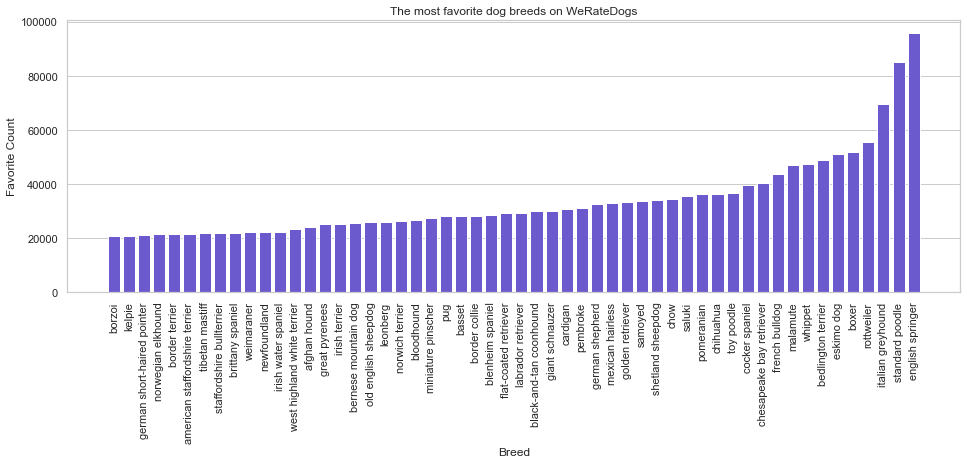

In [1748]:
bar_chart(most_liked_breed['favorite_count'].sort_values(),
          'slateblue','The most favorite dog breeds on WeRateDogs','Breed','Favorite Count',90)

1. English Springer has been on average most favorited dog breed on WeRateDogs. It received on avarage nearly 10k favorite hits on Twitter. Followed by Standard Poodle with over 8.5k hits and Italian Greyhound with nearly 7k hits.

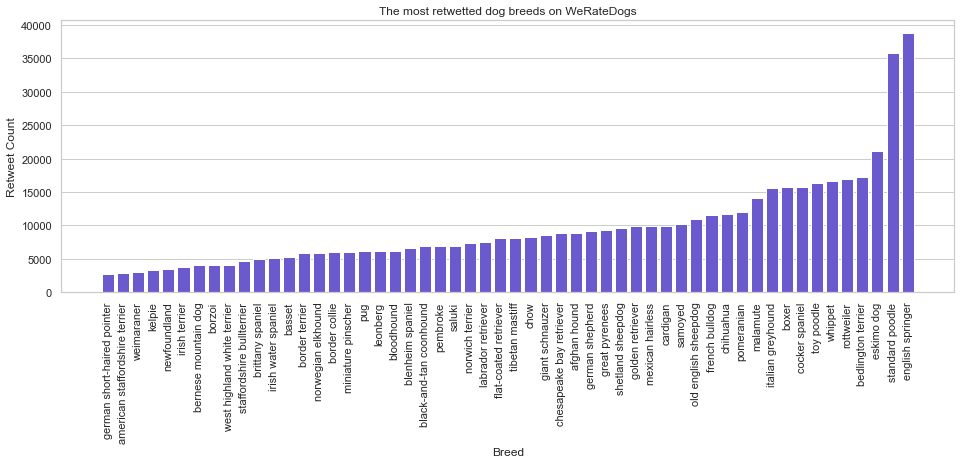

In [1749]:
bar_chart(most_liked_breed['retweet_count'].sort_values(),
          'slateblue','The most retwetted dog breeds on WeRateDogs','Breed','Retweet Count',90)

2. English Springer is not only most favorite by also most retweetted breed with nearly 4k retweets. It is followed by Standard Poodle which on avarage was retweetted nearly 3.6k times. 

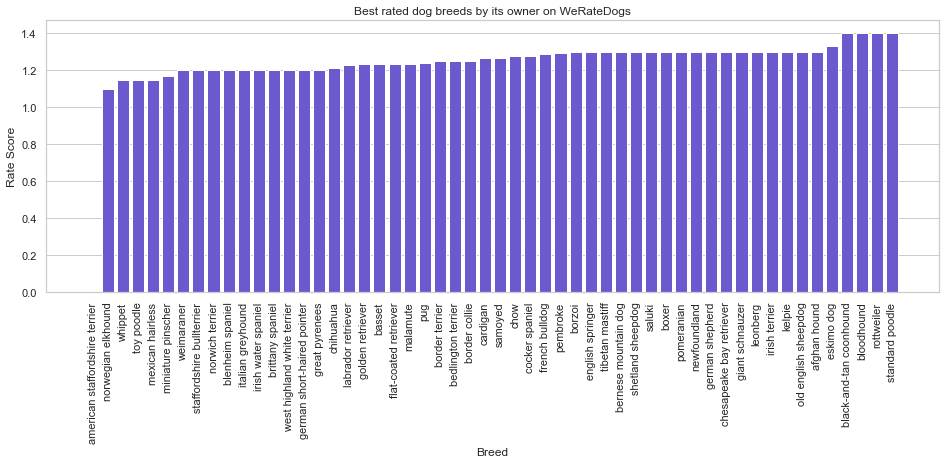

In [1750]:
bar_chart(most_liked_breed['dog_score'].sort_values(),
          'slateblue','Best rated dog breeds by its owner on WeRateDogs','Breed','Rate Score',90)

3. For breeds share first place in their owners rating. Standard Poodle, Bloodhount, Rottweiler and Black and Tan Coonhound. These take first place is dogs rating by owners. It is calculated by WeRateDogs standard where owners can rate with higher numerator than denominator. First for scored 1.4 which is = 140%

In [1751]:
#creating function for all line charts in case study
def line_chart(var,x_axis,y_axis,color,x_label,y_label,title):
    ax = sns.lineplot(data=var, x=x_axis, y=y_axis, color=color,linewidth=3)
    sns.set(rc={'figure.figsize':(16,8)})
    sns.set(style="whitegrid")
    ax.set(xlabel=x_label, ylabel=y_label,title=title);

##### Removing 5% of high and low outliers and grouping data based on the date

In [1752]:
drop_low_outliers = main[main.favorite_count > main.favorite_count.quantile(.05)]
drop_high_outliers = drop_low_outliers[drop_low_outliers.favorite_count < drop_low_outliers.favorite_count.quantile(.95)]
most_tweets = drop_high_outliers.groupby('created_at').mean()

##### Calculating 7 day moving average to smoothen graph for most tweets based on date

In [1753]:
for i in range(0,most_tweets.shape[0]-6):
    most_tweets.loc[most_tweets.index[i+6],'sma_7_fav'] = np.round(((most_tweets.iloc[i,1]+ most_tweets.iloc[i+1,1] +most_tweets.iloc[i+6,1])/7),1)


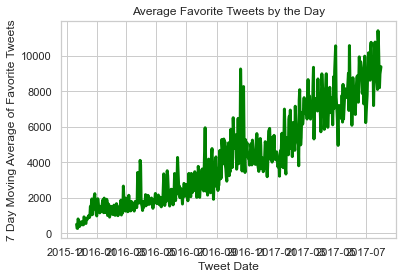

In [1754]:
line_chart(most_tweets,'created_at','sma_7_fav','green','Tweet Date',
           '7 Day Moving Average of Favorite Tweets','Average Favorite Tweets by the Day')

4. Based on the graph we can see that 7 days moving average of favorited Tweets is steadily increasing over time. However, it is important to note that around November 2016 there were few weeks of massive jump in favorited Tweets. We can make conclusion that WeRateDogs page is increasingly become more and more popular and draws more attention from users.

##### Removing 5% of high and low outliers and grouping data based on language

In [1755]:
drop_low_outliers = main[main.favorite_count > main.favorite_count.quantile(.05)]
drop_high_outliers = drop_low_outliers[drop_low_outliers.favorite_count < drop_low_outliers.favorite_count.quantile(.95)]
tweets_language = main.groupby('language').mean()

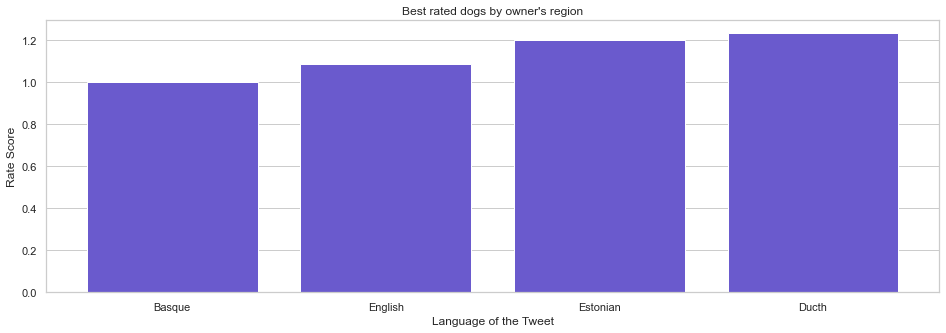

In [1756]:
bar_chart(tweets_language['dog_score'].sort_values(),
          'slateblue','Best rated dogs by owner\'s region','Language of the Tweet','Rate Score',0)

5. Bar chart above shows dog scores based on which language it was tweeted. It is assumed that owners are from country in which it was Tweetted. Taking that into account we can look closer who loves their animals the most and gives them best reviews. It happens to be Dutch that rate their dogs’ highest. Followed by Estonians and lastly English-speaking regions that can be assumed as multinational.

In [1757]:
#creating function for all correlation charts in case study
def scatter_plot(size,var1,var2,title,x_label,y_label):
    N = size.count()
    colors = 'slateblue'
    area = (30 * np.random.rand(N))**1.5
    plt.scatter(var1,var2,s=area,c=colors, alpha=0.9)
    plt.title(title)
    plt.ylabel(x_label)
    plt.xlabel(y_label);

In [1758]:
main.head()

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,jpg_url,dog_type,dog_score,breed
1,2017-08-01,892177421306343426,5452,30157,English,iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,,1.3,chihuahua
2,2017-07-31,891815181378084864,3592,22696,English,iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,,1.2,chihuahua
3,2017-07-30,891689557279858688,7486,38078,English,iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,,1.3,labrador retriever
4,2017-07-29,891327558926688256,8046,36369,English,iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,,1.2,basset
5,2017-07-29,891087950875897856,2698,18340,English,iPhone,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,,1.3,chesapeake bay retriever


##### Removing 15% of high and 5% of low outliers and grouping data based on language

In [1759]:
drop_low_outliers = main[main.favorite_count > main.favorite_count.quantile(0.05)]
drop_high_outliers = drop_low_outliers[drop_low_outliers.favorite_count < drop_low_outliers.favorite_count.quantile(.85)]
correl_data = drop_high_outliers.groupby('tweet_id').mean()

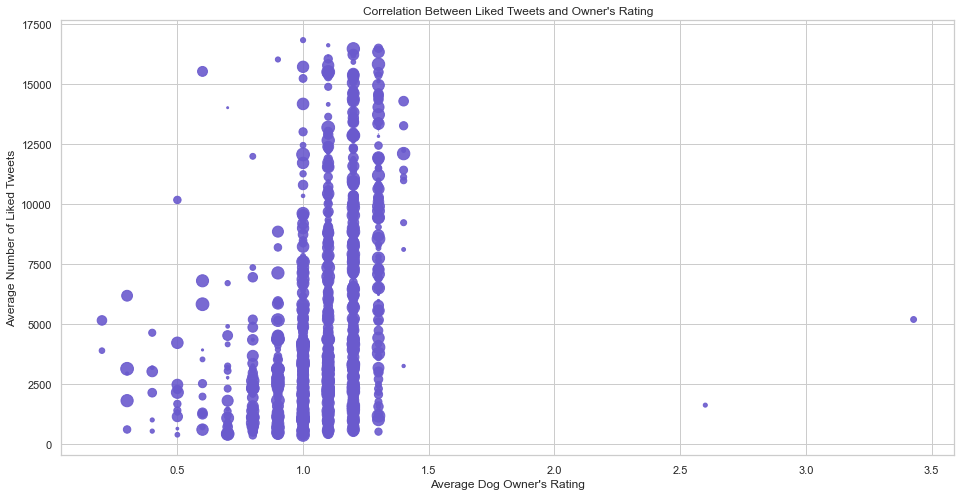

In [1760]:
scatter_plot(correl_data['favorite_count'],correl_data['dog_score'],correl_data['favorite_count'],
            'Correlation Between Liked Tweets and Owner\'s Rating',
            'Average Number of Liked Tweets','Average Dog Owner\'s Rating')

6. Correlation between dog score that owner give to their pets and likes on Twitter is pretty weak. It seems like owners are wider audience not necessarily have similar views. It could well be expected as all owners love their pets the most.

In [1761]:
correl_data.corr(method ='pearson')

,retweet_count,favorite_count,dog_score
retweet_count,1.000000,0.873511,0.276269
favorite_count,0.873511,1.000000,0.362581
dog_score,0.276269,0.362581,1.000000


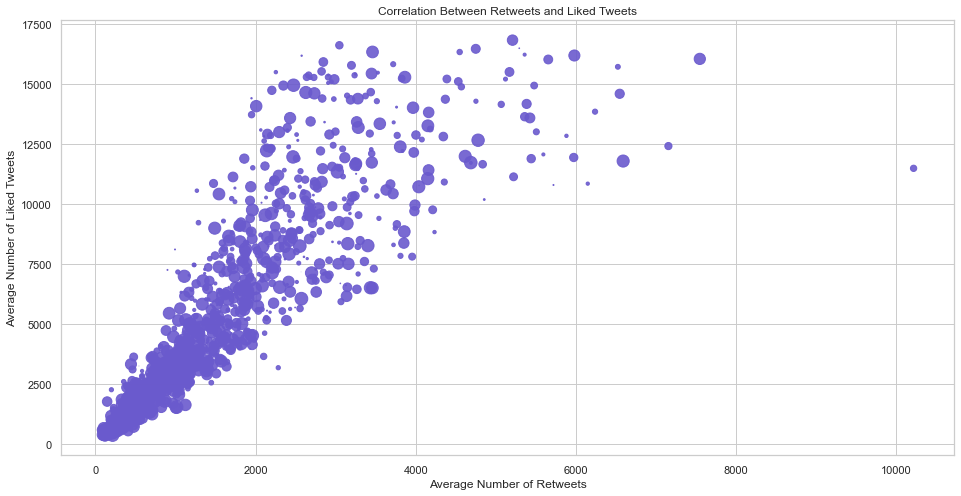

In [1762]:
scatter_plot(correl_data['favorite_count'],correl_data['retweet_count'],correl_data['favorite_count'],
            'Correlation Between Retweets and Liked Tweets',
            'Average Number of Liked Tweets','Average Number of Retweets')

7. Correlation above shows relationship between retweets and favorited counts. Graph indicates that there is a strong correlation between post being liked and then retweet.

In [1763]:
dog_types =  main.query('dog_type == "pupper" or dog_type == "floofer" or dog_type == "doggo" or dog_type == "puppo"')
dog_types = dog_types.groupby('dog_type').mean()

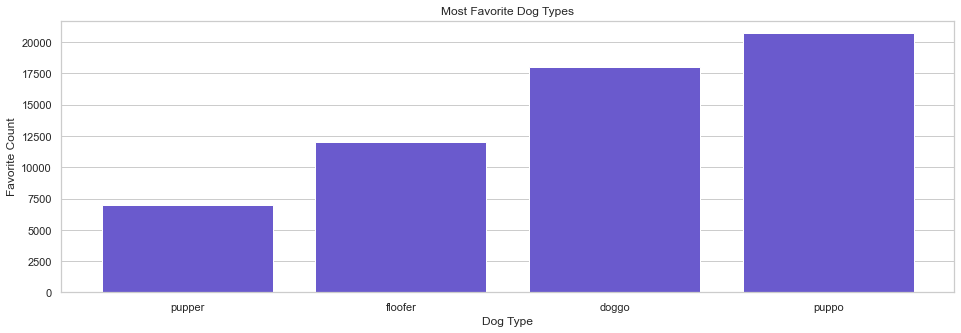

In [1766]:
bar_chart(dog_types['favorite_count'].sort_values(),
          'slateblue','Most Favorite Dog Types','Dog Type','Favorite Count',0)

8. Looking and most beloved dog types on Tweeter we can see that puppo is leading the the way. It is followed by doggo an floofer.

### Conclusion

>Project helped to disclose which dog breed are trending on WeRateDogs Twitter account. It happened to be that most favourite dogs are also most retweet dog breeds which is English Springer. However, dog owner gave best votes to Standard Poodles. 
>
>Further analysis show that WeRateDogs website is become increasingly more popular over time. As there are and more tweets favourite on the page though the time. 
>
>Lastly, correlation between owner's dog ratings and favourite votes on WeRateDogs have been analysed which showed that there is weak correlation between two variables. In addition, analysis looked at correlation between favourite tweets and retweets. As expected it showed strong correlation between two variables. It means that those post which get many likes are likely to be tweeted often.
>
### Limitations

>Analysis is limited to extracted data from Twitter and picture recognition file provided by Udacity. It is also limited to twitter AI photo recognition which at the best attempt on average deliver just over 50% of confidence.
>
>Also, analysis is limited to given ratings provided by owners which can contain higher numerator than denominator.
>
>Analysis is limited just retweets, favorited tweets, derived dog rating, publication date, language, publishing type, images and breed of the dogs.
>
>Dropping non-dog information and applying certain thresholds to exclude outliers might skew analysis and could have unintentional bias towards results.
>
>Also, it is limited to given dog types which are not provided for every Tweet.
